In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

<center><b>Task 2. Named entity recognition + image classification</b></center>

In this task, you will work on building your ML pipeline that consists of 2 models responsible for
totally different tasks. The main goal is to understand what the user is asking (NLP) and check if
he is correct or not (Computer Vision).

You will need to:

* find or collect an animal classification/detection dataset that contains at least 10
classes of animals.
* train NER model for extracting animal titles from the text. Please use some
transformer-based model (not LLM).
* Train the animal classification model on your dataset.
* Build a pipeline that takes as inputs the text message and the image.

In [4]:
!pip install -r requirements.txt


  Using cached importlib_metadata-8.6.1-py3-none-any.whl (26 kB)
  Using cached importlib_resources-6.4.5-py3-none-any.whl (36 kB)
  Using cached matplotlib-3.8.4-cp310-cp310-win_amd64.whl (7.7 MB)
  Using cached python_version-0.0.2-py2.py3-none-any.whl (3.4 kB)
  Using cached seqeval-1.2.2.tar.gz (43 kB)


    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\user\AppData\Local\Programs\Python\Python310\python.exe' -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\user\\AppData\\Local\\Temp\\pip-install-t0d5ejw2\\seqeval_4e8ff6fc3f14473f912f3f4679115b42\\setup.py'"'"'; __file__='"'"'C:\\Users\\user\\AppData\\Local\\Temp\\pip-install-t0d5ejw2\\seqeval_4e8ff6fc3f14473f912f3f4679115b42\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\user\AppData\Local\Temp\pip-pip-egg-info-31qjk077'
         cwd: C:\Users\user\AppData\Local\Temp\pip-install-t0d5ejw2\seqeval_4e8ff6fc3f14473f912f3f4679115b42\
    Complete output (28 lines):
    Traceback (most recent call last):
      File "C:\Users\user\AppData

<center><b>Exploratory Data Analysis</b></center>

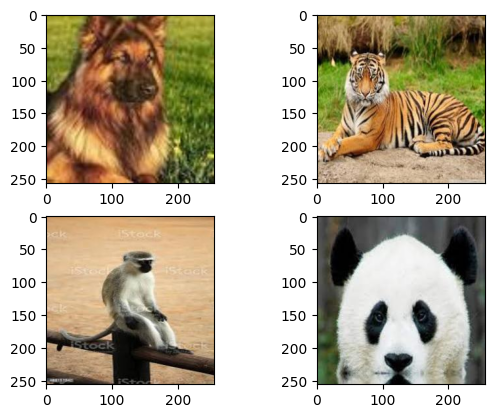

In [5]:
image_1_path='./Dog_eda.jpeg'
image_2_path= './Tiger_eda.jpeg'
image_3_path= './VM_eda.jpeg'
image_4_path= './Panda_eda.jpeg'
images=[image_1_path,image_2_path,image_3_path,image_4_path]

fig,axes=plt.subplots(2,2)
for i,img_path in enumerate(images):
    image = Image.open(img_path)
    if i>1:
        i-=2
        axes[1, i].imshow(image)
    else:
        axes[0, i].imshow(image)


For creation of model for image classification of animals i need labeled dataset of animals' images that consist of at least 10 classes. I found one of them on kaggle,

 credit: <url> https://www.kaggle.com/datasets/utkarshsaxenadn/animal-image-classification-dataset</url>. Images already splitted into train/test folders, so i just need to import them. During the 
 
 training, I used only 300 images for each animal, for testing i used 100 images.  Below is a histogram that shows distribution among classes, as we can see it is all the same.

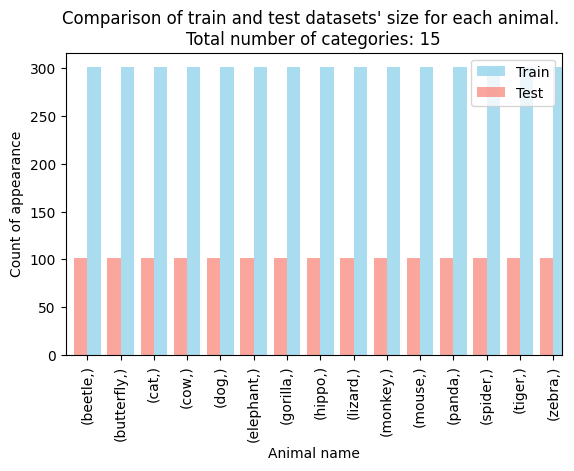

In [7]:

train=pd.read_csv('y_Train_images.csv')
test=pd.read_csv('y_Test_images.csv')

train_counts=train.value_counts()
test_counts=test.value_counts()

fig=plt.figure()
fig.subplots_adjust(bottom=0.25)
ax = plt.gca()
plt.ylabel('Count of appearance')
plt.xlabel('Animal name')



train_counts.plot(kind="bar", color="skyblue", alpha=0.7, ax=ax, position=0, width=0.4, label="Train")
test_counts.plot(kind="bar", color="salmon",  alpha=0.7, ax=ax, position=1, width=0.4, label="Test")
plt.xlabel('Animal name')
plt.legend()
plt.title(f"Comparison of train and test datasets' size for each animal. \nTotal number of categories: {np.unique(train).size}")
plt.show()

In sum, we have photos of 15 animals and distribution among them is the same that means this is a balanced dataset. 

The next thing in this task we need to explore is sentences. The user provides a text similar to “There is a cow in the picture.”. I made a list of 20 samples that similar to the sentence and fill 

the animal name in them. in sum i have list of names of 80 animals. After generation of dataset i have 1600 sentences that will be divided into training and testing sets for Name-Entity-Recognition model.

In [14]:

animals =  [
    "eagle", "robin", "fox", "hawk", "elk", "seal", "snake", "chickens", "wolf", "bison", "pigeon",
    "otter", "whale", "canary", "panther", "antelope", "hedgehog", "frog", "bee", "lynx", "buffalo",
    "coyote", "mole", "mountain goat", "sparrows", "raccoon", "rooster", "pig", "woodpecker", "falcon",
    "lemur", "crab", "skylark", "iguana", "duck", "snail", "gecko", "chipmunk", "tarantula", "osprey",
    "kingfisher", "kestrel", "ladybug", "heron", "python", "salamander", "warbler", "dragonfly",
    "caterpillar", "jaguar", "tortoise", "flamingo", "gibbon", "capybara", "gazelle", "dormouse",
    "finch", "crocodile", "snow leopard", "howler monkey", "water buffalo", "leopard", "horse",
    "gull", "chameleon", "beetle", "butterfly", "cat", "cow", "dog", "elephant", "gorilla", "hippo",
    "lizard", "monkey", "mouse", "panda", "spider", "tiger", "zebra"
] #Classes of animals

sentences=['There is a [animal] in the picture.',
           'There is a [animal] in the image.',
'There is a [animal] in the photo.'
,'A [animal] is in the picture.'
,'A [animal] is in the image.'
,'A [animal] is in the photo.'
,'The picture shows a [animal].'
,'The image shows a [animal].'
,'The photo shows a [animal].'
,'This picture contains a [animal].'
,'This image contains a [animal].'
,'This photo contains a [animal].'
,'I see a [animal] in the picture.'
,'We can see a [animal] in the image.'
,'You can see a [animal] in the photo.'
,'The picture depicts a [animal].'
,'The image depicts a [animal].',
'The photo depicts a [animal].',
'A [animal] appears in the picture',
'A [animal] appears in the image.'
           ] #Sentences sample for generation of dataset

print(sentences)
print('\n')
print(animals)
print('\n\n\n')
print('animals list size:',len(animals))
print('number of sentences:',len(sentences))

['There is a [animal] in the picture.', 'There is a [animal] in the image.', 'There is a [animal] in the photo.', 'A [animal] is in the picture.', 'A [animal] is in the image.', 'A [animal] is in the photo.', 'The picture shows a [animal].', 'The image shows a [animal].', 'The photo shows a [animal].', 'This picture contains a [animal].', 'This image contains a [animal].', 'This photo contains a [animal].', 'I see a [animal] in the picture.', 'We can see a [animal] in the image.', 'You can see a [animal] in the photo.', 'The picture depicts a [animal].', 'The image depicts a [animal].', 'The photo depicts a [animal].', 'A [animal] appears in the picture', 'A [animal] appears in the image.']


['eagle', 'robin', 'fox', 'hawk', 'elk', 'seal', 'snake', 'chickens', 'wolf', 'bison', 'pigeon', 'otter', 'whale', 'canary', 'panther', 'antelope', 'hedgehog', 'frog', 'bee', 'lynx', 'buffalo', 'coyote', 'mole', 'mountain goat', 'sparrows', 'raccoon', 'rooster', 'pig', 'woodpecker', 'falcon', 'lem

In [21]:
def generate_texts(sentences, animals):
    "Method for generating the dataset. It takes the sample of sentence and replace string [animal] with animal name."
    texts = []
    y_text = []
    for sentence in sentences:
        for animal in animals:
            texts.append(sentence.replace("[animal]", animal))
            y_text.append(animal)
    return texts, y_text

texts, y_text=generate_texts(sentences=sentences,animals=animals)
print('Example of sentences:')
print(texts[237:245])

Example of sentences:
['There is a spider in the photo.', 'There is a tiger in the photo.', 'There is a zebra in the photo.', 'A eagle is in the picture.', 'A robin is in the picture.', 'A fox is in the picture.', 'A hawk is in the picture.', 'A elk is in the picture.']


<b>Key points from EDA:</b>
* Dataset for image classification model is balanced and consist of 300 train images and 100 test images for 15 animals. In sum, 4500 training images and 1500 of testing images.

* Name-entity recognition model trained on list of 80 animals that way bigger than image classification model.

* Dataset for NER model was generated from list of samples of sentences, where each name of animals was filled in. 

* Dataset for NER model consist of 1600 sentences that will be divided into train and test datasets.

<center><b>Image Classification model</b></center>

As for image classification model i choose Convolution Neural Network model that build on tensorflow and has next architecture:

* input of (64,64,1) tensor, 

* Convolution layer with 32 filters of (3,3) size with relu activation, 

* MaxPooling layer, 

* Convoluition layer with 64 filters of (3,3) with relu activation, 

* MaxPooling layer, 

* Flatten layer and then Dense layers with 512, 256, 128 neurons, respectively, with relu as activation function, 

* The final layer is a dense of 15 neurons with softmax as activation function. 

As a loss function for training of this model was used the "sparse_categorical_crossentropy" and Adam as an optimizer. 

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Flatten,Input, Conv2D,MaxPooling2D,Conv3D,MaxPooling3D
from tensorflow.keras import metrics as keras_metrics
import numpy as np
from keras.models import load_model
from PIL import Image

learning_rate=0.001
epochs=10
batch_size=32
resized_img_shape=(64,64)
animals = ['beetle', 'butterfly', 'cat', 'cow', 'dog', 'elephant', 'gorilla', 'hippo', 'lizard', 'monkey',
           'mouse', 'panda', 'spider', 'tiger', 'zebra']  # animals on which the image classification model was trained

class CNNClassifier:
    """
    Convolution Neural Network model for Animal Images Classification
    """

    def __init__(self,path=None):
        'As input receives an argument of path that indicates to load weights of the model for its inference. '
        if path is None:

            #Model architecture consist of 2 Convolution and Pooling layers combined one by one, then it flatten tensors and go through  feed forward layers
            input = Input(shape=(*resized_img_shape,1), dtype=tf.float32)

            conv1 = Conv2D(32, (3, 3), activation='relu', name='conv_layer_1')(input)
            pool1 = MaxPooling2D((2, 2), name='maxpool_layer_1')(conv1)
            conv2 = Conv2D(64, (3, 3), activation='relu', name='conv_layer_2')(pool1)
            pool2 = MaxPooling2D((2, 2), name='maxpool_layer_2')(conv2)

            flatten = Flatten()(pool2)
            dense1 = Dense(512, activation='relu', name='dense_layer_1')(flatten)
            dense2 = Dense(256, activation='relu', name='dense_layer_2')(dense1)
            dense3 = Dense(128, activation='relu', name='dense_layer_3')(dense2)
            output_layer = Dense(15, activation='softmax', name='output_layer')(dense3)
            self.model = Model(inputs=input, outputs=output_layer)
            self.model.summary()
        else:
            self.model=load_model('image_classification_model.h5')
    def train(self,x_train,y_train,epochs=epochs,batch_size=batch_size,learning_rate=learning_rate):
        'Method for model training receives as arguments X and Y, epochs and batch_size '
        self.epochs=epochs
        self.batch_size=batch_size
        self.learning_rate=learning_rate


        x_train=x_train.reshape((x_train.shape[0],*resized_img_shape,1))
        metrics=['accuracy']
        self.model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=metrics)
        self.model.fit(x_train, y_train,learning_rate=self.learning_rate,epochs=self.epochs, batch_size=self.batch_size)

    def predict(self,x_test):
        'Method for predicting the label of the animal class on image'
        #If we works with batch where number of images is large than 1 then we use tf.image.resize method. Otherwise, we use method from Pillow library.
        if x_test.shape[0]>1:
            x_test = tf.image.resize(x_test,resized_img_shape)
        else:
            img = Image.fromarray(x_test)  # turn x_test from ndarray to pil.image
            img = img.resize(resized_img_shape) #resize to needed shape
            x_test = np.asarray(img)#turn back to ndarray
            x_test = x_test[None, ..., None] #add dimension of batch and channel
        y_pred = self.model.predict(x_test)
        return np.argmax(y_pred, axis=1)
    def predict_animal_name(self,x_test):
        'Method similar as predict but returns the animal name'
        if x_test.shape[0]>1:
            x_test = tf.image.resize(x_test, resized_img_shape)
        else:
            img = Image.fromarray(x_test[0,:,:,0])  
            img = img.resize(resized_img_shape)
            x_test = np.asarray(img)
            x_test = x_test[None, ..., None]
        y_pred = self.model.predict(x_test)
        return animals[np.argmax(y_pred, axis=1)[0]]

    def save(self,path):
        "Method for saving the model's weights"
        self.model.save(path)




Aftter creation of model's class, we can train it. We read directories of "train_data" and "test_data", where images separated into animals. As I said, for each animal i used 300 training images for 

each animal and 100 of testing. <u>I trained the model on grayscale images.</u> 

As output of the model i have index of the animal but for the task in pipeline i have created the function that returns name of predicted class. After training the model i export it in .h5 format, 

this way i have trained it once and then i can load the model whenever i need to inference model.

As settings of training proccess we can change learning rate, training epochs and batch_size in train method. The number of epochs will influence on model's overfitting on dataset.

In [ ]:
import tensorflow as tf
import numpy as np
from image_classification_model import CNNClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import os

train_path='train_data/'
test_path='test_path/'
max_count=300 #Limit on the number of photos
img_channels=1 #number of img channels
image_size=(64,64) #size to which it should resize imported images
X = []
Y = []

train_epochs=10
train_batch_size=32
#Load images, normalize and resize them
def load_img(img):
    img=tf.io.read_file(img)
    img=tf.image.decode_jpeg(img,channels=img_channels)
    img=tf.cast(img,tf.float32)/255
    img=tf.image.resize(img,image_size)
    return img

def import_folder(path,max_count=100):
    x_data,y_data=[],[]
    for animal_folder in os.listdir(train_path):
        count=0
        for image_path in os.listdir(os.path.join(train_path,animal_folder)):
            if count>max_count: #import N images from the folder. It limits the size of dataset
                break
            x_data.append(load_img(os.path.join(train_path,animal_folder,image_path)))
            y_data.append(str.lower(animal_folder))
            count+=1

    return np.array(x_data),np.array(y_data)


#Import images
x_train,y_train=import_folder(train_path,max_count)

x_test,y_test=import_folder(test_path)
print('Importing is finished.')

#Encode Y labels of images into indexes of animal names
labelencoder=LabelEncoder()
y_train=labelencoder.fit_transform(y_train)
y_test=labelencoder.transform(y_test)
print('LabelEncoding is finished.')
y_train = y_train.reshape(-1,)

#Initilialization of  model
model=CNNClassifier()


#Model training
print('\nStart training.')
model.train(x_train,y_train,epochs=train_epochs,batch_size=train_batch_size)

#Model predict and quality assessment
y_pred=model.predict(x_test)

acc_score = accuracy_score(y_test, y_pred)
print(f'Accuracy score for test data: {acc_score}')


model.save('image_classification_model.h5') #commented for jupyter notebook



Importing is finished.
LabelEncoding is finished.
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 64, 64, 1)]       0         
                                                                 
 conv_layer_1 (Conv2D)       (None, 62, 62, 32)        320       
                                                                 
 maxpool_layer_1 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv_layer_2 (Conv2D)       (None, 29, 29, 64)        18496     
                                                                 
 maxpool_layer_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten_

Below we can see how classification model works separately from pipeline.

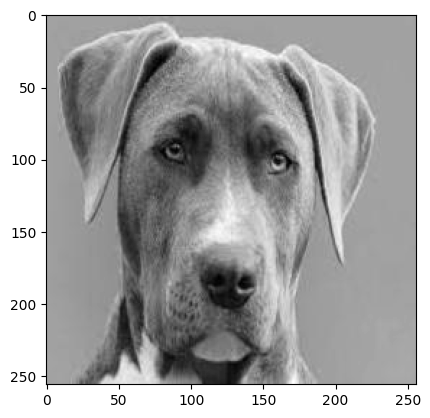

1/1 [==============================] - 0s 64ms/step
Model classify image as the photo of : dog


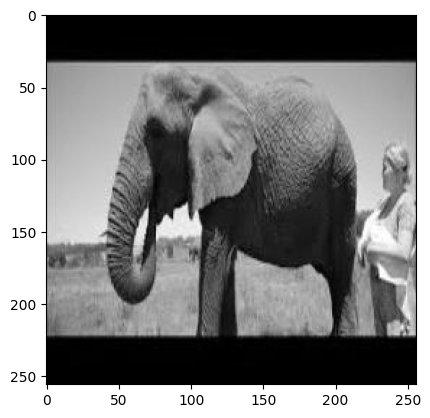

1/1 [==============================] - 0s 19ms/step
Model classify image as the photo of : panda


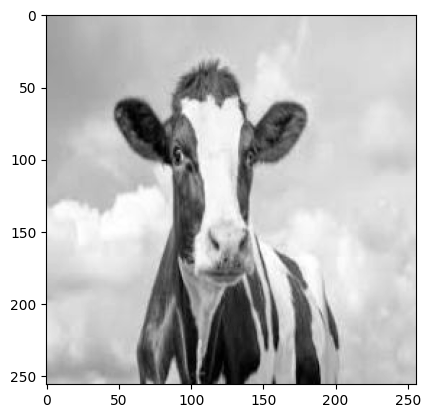

1/1 [==============================] - 0s 20ms/step
Model classify image as the photo of : cow


In [41]:
from image_classification_model import CNNClassifier
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Create variable with paths to images
path_to_image1 ='./Dog-Test (46).jpeg'
path_to_image2 ='./Elephant-Test (380).jpeg'
path_to_image3 ='./Cow-Test (15).jpeg'

#Path to the weights of model
classification_model_path ='image_classification_model.h5'

#Combine variable into one array
data =[path_to_image1 ,path_to_image2 ,path_to_image3]

#Load the model
model=CNNClassifier(classification_model_path)

for img  in data:
    plt.figure()
    image =np.asarray(Image.open(fr"{img}").convert('L'))#Import image
    image = np.expand_dims(image, -1)
    plt.imshow(image,cmap="gray")
    plt.show()
    image=image.reshape(-1,*image.shape)



    result=model.predict_animal_name(image)

    print(f'Model classify image as the photo of : {result}')


As we can see in the results, the model correctly recognized two of the three images.

<b>Key points from Image Classification Model:</b>

* The model was trained on grayscale images of 64x64 size.

* Model fitting process can be change with changing of number of epochs and batch_size in train method.

* The model has an accuracy score on train data 0.9849 and 0.9795 on test data.

* Inference of model on three images shows that it correctly recognized only two of them.

<center><b>Name-Entity Recognition Model</b></center>

After creation of the image classification model, we can move on to the second model of the pipeline is the Name Entity Recognition model.

This model was created with finetuning of the BERT model from HuggingFace. Dataset for finetuning was generated from samples of sentence that similar to the example. 

NER model class consist of _init_ and extract_animals methods. Training process is described in separate class NERmodelTrainer because of its size.

In _init_ method i load pretrained tokenizer and model, also i set dict of labels for model. The training process will be described in the next code section.

In [ ]:
import numpy as np
import tensorflow as tf
from transformers import TFBertForTokenClassification, AutoTokenizer, BertConfig


class NERmodel():
    "Model class consist of 3 methods: init,train,extract_animals. Train method is implemented in separated script because of large construction. "
    def __init__(self,path_to_model):

        "Initialization of model with loading weights and tokens from given path."
        id2label = {0: "O", 1: "ANIMAL"}
        label2id = {"O": 0, "ANIMAL": 1}

        self.model=TFBertForTokenClassification.from_pretrained(path_to_model,num_labels=2,
    id2label=id2label,
    label2id=label2id)

        self.tokenizer=AutoTokenizer.from_pretrained(path_to_model)

        print('NER model is loaded.')
    def train(self,train_dataset):
        "Method of model train is in separate class"
        print('Method of ner model training is in separate class')
        pass

    def extract_animals(self,test_dataset):
        "Function for extract of animal name from sentence. eturns animal name and tokens tags"
        inputs = self.tokenizer(test_dataset, return_tensors="tf")
        output=self.model(**inputs)
        predictions =np.argmax(output.logits,axis=-1)[0]

        tokens=self.tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])
        results = [
            (token, self.model.config.id2label[label_id])
            for token, label_id in zip(tokens, predictions)
        ]

        animal_token = [token for token, tag in results if "ANIMAL" in tag]
        if len(animal_token)==0:
            animal_token=None
        else:
            animal_token=animal_token[0]


        return animal_token,results


c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\huggingface_hub\file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Map: 100%|██████████| 14/14 [00:00<00:00, 2794.47 examples/s]


As mentioned above, the dataset for fine‑tuning the model was created from sample sentences similar to the provided example. The dataset consists of 1,600 sentences, which will be split into training 

and test sets using a 70/30 ratio. User can change this ratio while initializing class. 

As you can see, we create dataset in this class and then process it (tokenizing, padding, align label with subtokens). After tokenizing we make sure that all labels have the same length so we add 

padding to fill the empty elements in array. After processing the texts we can combine all data about sentences (texts,tokens,labels,tags) in one Dataset. The final step is batching the dataset and

start to finetuning the model.

For fitting the data we use Adam optimizer, as loss function i used SparseCategoricalCrossentropy and as metric SparseCategoricalAccuracy. Train method has attributes batch_size,train_epochs,learning 

that will influence on fitting data.


In [42]:
import pandas as pd
from transformers import TFBertForTokenClassification,BertTokenizerFast
from tensorflow.keras.preprocessing.sequence import pad_sequences
from datasets import Dataset, DatasetDict
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import re

random_state=42
batch_size=2
train_epochs=5
learning_rate=5e-5
test_size=0.3

animals =  [
    "eagle", "robin", "fox", "hawk", "elk", "seal", "snake", "chickens", "wolf", "bison", "pigeon",
    "otter", "whale", "canary", "panther", "antelope", "hedgehog", "frog", "bee", "lynx", "buffalo",
    "coyote", "mole", "mountain goat", "sparrows", "raccoon", "rooster", "pig", "woodpecker", "falcon",
    "lemur", "crab", "skylark", "iguana", "duck", "snail", "gecko", "chipmunk", "tarantula", "osprey",
    "kingfisher", "kestrel", "ladybug", "heron", "python", "salamander", "warbler", "dragonfly",
    "caterpillar", "jaguar", "tortoise", "flamingo", "gibbon", "capybara", "gazelle", "dormouse",
    "finch", "crocodile", "snow leopard", "howler monkey", "water buffalo", "leopard", "horse",
    "gull", "chameleon", "beetle", "butterfly", "cat", "cow", "dog", "elephant", "gorilla", "hippo",
    "lizard", "monkey", "mouse", "panda", "spider", "tiger", "zebra"
] #Classes of animals

sentences=['There is a [animal] in the picture.',
           'There is a [animal] in the image.',
'There is a [animal] in the photo.'
,'A [animal] is in the picture.'
,'A [animal] is in the image.'
,'A [animal] is in the photo.'
,'The picture shows a [animal].'
,'The image shows a [animal].'
,'The photo shows a [animal].'
,'This picture contains a [animal].'
,'This image contains a [animal].'
,'This photo contains a [animal].'
,'I see a [animal] in the picture.'
,'We can see a [animal] in the image.'
,'You can see a [animal] in the photo.'
,'The picture depicts a [animal].'
,'The image depicts a [animal].',
'The photo depicts a [animal].',
'A [animal] appears in the picture',
'A [animal] appears in the image.'
           ] #Sentences sample for generation of dataset


def generate_texts(sentences, animals):
    "Method for generating the dataset. It takes the sample of sentence and replace string [animal] with animal name."
    texts = []
    y_text = []
    for sentence in sentences:
        for animal in animals:
            texts.append(sentence.replace("[animal]", animal))
            y_text.append(animal)
    return texts, y_text
def encode_texts(label):
    "Encoding tokens in sentences with ner_tags "
    labels_encoding={0:"O", 1: "B-ANIMAL"}
    return [labels_encoding[label[i]] for i in range(len(label))]

def encode_message(message, animals):
    "Encoding tokens with target as 1 where it signals that token is related to animals"
    message = message.lower()
    words = re.findall(r"\w+", message)
    encoded_words = [1 if any(animal in word for animal in animals) else 0 for word in words]
    return encoded_words



class NERModelTrainer():
    def __init__(self,random_state=random_state,test_size=test_size,batch_size=batch_size,train_epochs=train_epochs, learning_rate=learning_rate):

        #Parameters initialization
        self.random_state=random_state
        self.batch_size=batch_size
        self.train_epochs=train_epochs
        self.test_size=test_size
        self.learning_rate=learning_rate

        #Model will be based on bert-base-uncased
        self.tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased")
        self.model = TFBertForTokenClassification.from_pretrained("bert-base-uncased", num_labels=2)

    def pad_to_max_length(self, sequences, max_length, padding_value=0):

        return [seq + [padding_value] * (max_length - len(seq)) for seq in sequences]

    def tokenize_and_align_labels(self, examples, label_all_tokens=True):
        "Function tokenizes words, aligns the labels with the subtokens, and applies padding"

        tokenized_inputs = self.tokenizer(examples["tokens"], truncation=True, is_split_into_words=True)
        labels = []
        max_length = 24

        #
        for i, (label, text) in enumerate(zip(examples["labels"], examples["text"])):
            word_ids = tokenized_inputs.word_ids(batch_index=i)

            current_word = None
            label_ids = []

            # Word_idx is related to subtokens. If word_idx is None (start or end of sentence) or bigger than size of label then its label equals 0.
            # Else it returns label from array of original labels.  Each time updating max_length of label to padding arrays to the same length.
            for word_idx in word_ids:
                if word_idx != current_word:
                    current_word = word_idx
                    label_temp = 0 if (word_idx is None) or (word_idx >= len(label)) else label[word_idx]
                    label_ids.append(label_temp)

                elif word_idx is None:
                    label_ids.append(0)
                else:
                    label_ids.append(0)

            labels.append(label_ids)

            max_length = max(max_length, len(label_ids))
        #Extend arrays to the same length
        tokenized_inputs['input_ids'] = pad_sequences(tokenized_inputs['input_ids'], maxlen=max_length, padding="post",
                                                      value=0)
        labels = pad_sequences(labels, maxlen=max_length, padding="post", value=0)
        tokenized_inputs["labels"] = labels
        return tokenized_inputs

    def create_dataset(self):
        "Function creates the dataset, then tokenizes it and prepares train and test data with their export afterwards"

        texts,y_text=generate_texts(sentences,animals) #Generate dataset

        train_texts,test_texts,y_train,y_test=train_test_split(texts,y_text,test_size=self.test_size,random_state=self.random_state) #split into train/test data


        ########################################################################################################################################################################################################################################################################################################################

        #create labels for datasets
        train_labels = [encode_message(text, animals) for text in train_texts]
        test_labels = [encode_message(text, animals) for text in test_texts]

        #export data for EDA
        pd.DataFrame(train_texts).to_csv('train_texts.csv',index=False)
        pd.DataFrame(y_train).to_csv('train_labels.csv',index=False)

        pd.DataFrame(test_texts).to_csv('test_texts.csv',index=False)
        pd.DataFrame(y_test).to_csv('test_labels.csv',index=False)
        print('Train and test datasets are exported')

        train_texts=np.array(train_texts)
        test_texts=np.array(test_texts)

        #Create ner_tags for data
        train_ner_tags=[encode_texts(label) for label in train_labels]
        test_ner_tags=[encode_texts(label) for label in test_labels]

        #Tokenize data
        train_tokens=[self.tokenizer.tokenize(text) for i,text in enumerate(train_texts)]
        test_tokens=[self.tokenizer.tokenize(text) for i,text in enumerate(test_texts)]

        #Combine all data in dataset
        train_dataset=Dataset.from_dict({"text": train_texts, "labels": train_labels, "tokens": train_tokens,'ner_tags':train_ner_tags})
        test_dataset=Dataset.from_dict({"text": test_texts, "labels": test_labels, "tokens": test_tokens,'ner_tags':test_ner_tags})

        #Combine train and test data into one dataset
        self.dataset = DatasetDict({"train": train_dataset,
                                     "test": test_dataset})




        #Align labels to subtokens and extend arrays with padding if it needed
        tokenized_dataset = self.dataset.map(self.tokenize_and_align_labels, batched=True)


        max_length_train = max(len(seq) for seq in tokenized_dataset["train"]["input_ids"])
        max_length_test = max(len(seq) for seq in tokenized_dataset["test"]["input_ids"])
        max_length = max(max_length_train, max_length_test)

        # Get data from tokenized dataset and extend attention mask with padding that all arrays will be the same size
        train_inputs = tokenized_dataset["train"]["input_ids"]
        train_attention_mask = self.pad_to_max_length(tokenized_dataset["train"]["attention_mask"], max_length, padding_value=0)
        self.train_labels = tokenized_dataset["train"]["labels"]

        test_inputs = tokenized_dataset["test"]["input_ids"]
        test_attention_mask = self.pad_to_max_length(tokenized_dataset["test"]["attention_mask"], max_length, padding_value=0)
        self.test_labels = tokenized_dataset["test"]["labels"]

        #Create batches of data for training and testing
        self.train_data = tf.data.Dataset.from_tensor_slices((
            {"input_ids": train_inputs, "attention_mask": train_attention_mask},
            self.train_labels
        )).batch(self.batch_size)

        self.test_data = tf.data.Dataset.from_tensor_slices((
            {"input_ids": test_inputs, "attention_mask": test_attention_mask},
            self.test_labels
        )).batch(self.batch_size)




    def train(self):
        "Function for model training"

        #Initialization of optimizer, loss function and metrics
        optimizer = tf.keras.optimizers.Adam(learning_rate=self.learning_rate)
        loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
        metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]


        self.model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
        #Model training
        self.model.fit(self.train_data, epochs=self.train_epochs)

        #Quality check
        predictions = self.model.predict(self.test_data)
        logits = predictions.logits #Extract logits

        predicted_labels = np.argmax(logits, axis=-1) #Round array shape from (batch_size, labels,2) to (batch_size,labels)

        y_test = np.argmax(np.array(self.test_labels), axis=-1) # Fill y_test array with position of animal label in the sentence

        metric = metrics[0] #extract metric function SparseCategoricalAccuracy
        metric.update_state(y_test, predicted_labels)

        print("Test SparseCategoricalAccuracy:", metric.result().numpy())


        #Model saving
        self.model.save_pretrained("./trained_ner_model")
        self.tokenizer.save_pretrained("./trained_ner_model")

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [44]:
from ner_model_trainer import NERModelTrainer

def main():
    trainer = NERModelTrainer()
    trainer.create_dataset()
    print('Dataset for training is created.')
    trainer.train()
    print('Model is exported.')

if __name__ == "__main__":
    main()


c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\huggingface_hub\file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
All PyTorch model weights were used when initializing TFBertForTokenClassification.

Some weights or buffers of the TF 2.0 model TFBertForTokenClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Train and test datasets are exported


INFO:tensorflow:Assets written to: ram://4697b1ec-2883-4073-a049-4738ce10dba0/assets


INFO:tensorflow:Assets written to: ram://4697b1ec-2883-4073-a049-4738ce10dba0/assets
Map: 100%|██████████| 1120/1120 [00:01<00:00, 647.01 examples/s]


INFO:tensorflow:Assets written to: ram://4434a3e4-2193-4417-b447-c0719bd8ef15/assets


INFO:tensorflow:Assets written to: ram://4434a3e4-2193-4417-b447-c0719bd8ef15/assets
Map: 100%|██████████| 480/480 [00:00<00:00, 4627.75 examples/s]


Dataset for training is created.
Epoch 1/5
560/560 [==============================] - 363s 623ms/step - loss: 0.0113 - sparse_categorical_accuracy: 0.9969
Epoch 2/5
560/560 [==============================] - 350s 625ms/step - loss: 0.0023 - sparse_categorical_accuracy: 0.9995
Epoch 3/5
560/560 [==============================] - 354s 631ms/step - loss: 8.8017e-04 - sparse_categorical_accuracy: 0.9997
Epoch 4/5
560/560 [==============================] - 355s 634ms/step - loss: 1.5127e-05 - sparse_categorical_accuracy: 1.0000
Epoch 5/5
240/240 [==============================] - 27s 98ms/step
Test SparseCategoricalAccuracy: 0.99919593
Model is exported.


After finetuning the model we can go to it inference. Let's check it out on simple sentence and then combine pair of animals in one sentence.

In [51]:
from ner_model import NERmodel

entity_recognition_model_path ='./trained_ner_model'
string='There is a dog.'
model=NERmodel(entity_recognition_model_path)
animal_name,tokens = model.extract_animals(string)
print(f'\nTokens predicted: {tokens}.\n')
print(f'\nAnimal predicted : {animal_name}. ')


string='There is a dog and cat.'
animal_name,tokens = model.extract_animals(string)
print(f'\nTokens predicted: {tokens}.\n')
print(f'\nAnimal predicted : {animal_name}. ')


string='This picture contains a cat.'
animal_name,tokens = model.extract_animals(string)
print(f'\nTokens predicted: {tokens}.\n')
print(f'\nAnimal predicted : {animal_name}. ')


Some layers from the model checkpoint at ./trained_ner_model were not used when initializing TFBertForTokenClassification: ['dropout_75']
- This IS expected if you are initializing TFBertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForTokenClassification were initialized from the model checkpoint at ./trained_ner_model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForTokenClassification for predictions without further training.


NER model is loaded.

Tokens predicted: [('[CLS]', 'O'), ('there', 'O'), ('is', 'O'), ('a', 'O'), ('dog', 'ANIMAL'), ('.', 'O'), ('[SEP]', 'O')].


Animal predicted : dog. 

Tokens predicted: [('[CLS]', 'O'), ('there', 'O'), ('is', 'O'), ('a', 'O'), ('dog', 'ANIMAL'), ('and', 'O'), ('cat', 'ANIMAL'), ('.', 'O'), ('[SEP]', 'O')].


Animal predicted : dog. 

Tokens predicted: [('[CLS]', 'O'), ('this', 'O'), ('picture', 'O'), ('contains', 'O'), ('a', 'O'), ('cat', 'ANIMAL'), ('.', 'O'), ('[SEP]', 'O')].


Animal predicted : cat. 


As we can see, in the first sentence  the model predicted the right token. But in the second, it's output only the first tag which is animal.  During finetuning the model there was a situation when appearance of two animals in one sentence leads to result where no token were tagged as animal.

<b>Key points from Name-Entity Recognition Model:</b>

* The model was trained on sentences that was generated from samples.  Combining 20 samples of sentence and 80 animals give us a dataset of 1600 sentences.  

* Model fitting process can be change with changing of learning rate, number of epochs and batch_size in _init_ method.

* The model has score sparse_categorical_accuracy 0.9993 on train data and 0.9992 on test data.

* Inference of model on three sentences shows that model makes good recognition on sentences with one animal, but when there are two animals the model outputs only the first that appears in  the sentence.

<center><b> Pipeline creation</b></center>

Below is shown a  Pipeline class, we can see that we load trained models during initialization. Pipeline has method evaluate that compares two string outputs from models and returns True if they  are similar. 

In [52]:
from ner_model import NERmodel
from image_classification_model import CNNClassifier
from keras.models import load_model
import tensorflow as tf
class Pipeline_for_task_2():
    def __init__(self,image_classification_model_path,entity_recognition_model_path):

        self.classification_model = CNNClassifier(image_classification_model_path)
        self.ner_model=NERmodel(entity_recognition_model_path)


    def evaluate(self,image,string):

        animals = ['beetle', 'butterfly', 'cat', 'cow', 'dog', 'elephant', 'gorilla', 'hippo', 'lizard', 'monkey',
                   'mouse', 'panda', 'spider', 'tiger',
                   'zebra']  # animals on which the image classification model was trained

        pred_animal=self.classification_model.predict_animal_name(image)


        animal_name,tokens=self.ner_model.extract_animals(string)
        if animal_name is not None:
            token_pred=str.lower(animal_name)
        else:
            print('\nPredicted animal name is None.\n')
            return False
        print(f'Image predict: {pred_animal}.')
        print(f'\nToken predict: {token_pred}.\n')
        if pred_animal not in token_pred:
            return False
        else:
            return True


Inference of pipeline is shown below. We take three photos and three sentences to them. Image classification will be described as image predict, but NER model will be described as Token predict because we extract token from the sentence. As we can see, NER model extract right entities but the image model made a mistake in classifying.

Some layers from the model checkpoint at ./trained_ner_model were not used when initializing TFBertForTokenClassification: ['dropout_75']
- This IS expected if you are initializing TFBertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForTokenClassification were initialized from the model checkpoint at ./trained_ner_model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForTokenClassification for predictions without further training.


NER model is loaded.


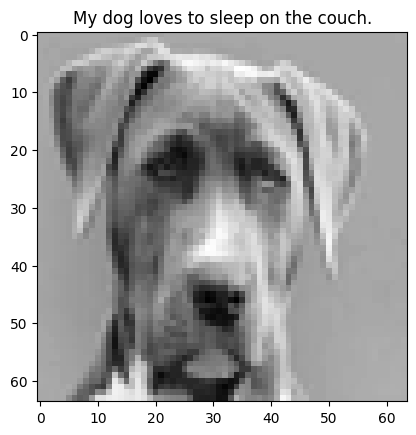

1/1 [==============================] - 0s 92ms/step
Image predict: dog.

Token predict: dog.

Result of pipeline: True


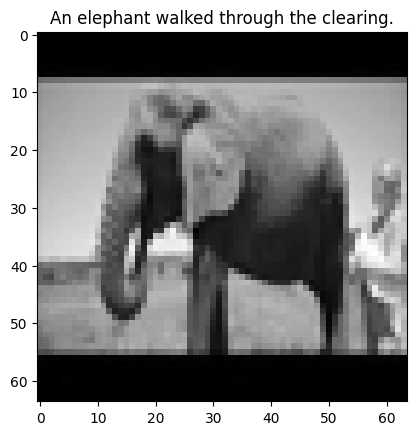

1/1 [==============================] - 0s 22ms/step
Image predict: panda.

Token predict: elephant.

Result of pipeline: False


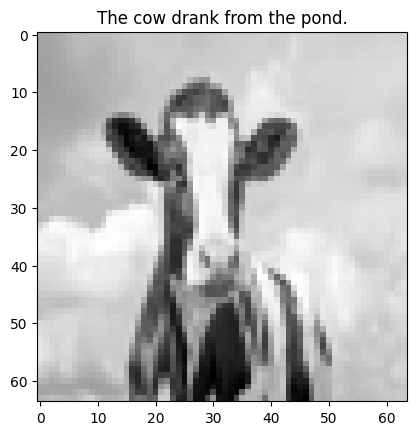

1/1 [==============================] - 0s 22ms/step
Image predict: cow.

Token predict: cow.

Result of pipeline: True


In [ ]:

import numpy as np
from pipeline import Pipeline_for_task_2
import tensorflow as tf
import PIL
from ner_model import NERmodel
from PIL import Image
import matplotlib.pyplot as plt

path_to_image1 ='./Dog-Test (46).jpeg'
path_to_image2 ='./Elephant-Test (380).jpeg'
path_to_image3 ='./Cow-Test (15).jpeg'

string= "The Unicorn pranced under the rainbow."

text1 ="My dog loves to sleep on the couch."
text2 ="An elephant walked through the clearing."
text3 ="The cow drank from the pond."

data =[(path_to_image1 ,text1) ,(path_to_image2 ,text2) ,(path_to_image3 ,text3)]

classification_model_path ='image_classification_model.h5'
entity_recognition_model_path ='./trained_ner_model'


pipeline =Pipeline_for_task_2(classification_model_path ,entity_recognition_model_path)


for img ,text in data:
    image =np.asarray(Image.open(fr"{img}").convert('L').resize((64 ,64)))
    image = np.expand_dims(image, -1)
    plt.imshow(np.squeeze(image),cmap="gray")
    plt.title((text))
    plt.show()
    image = image.reshape((-1, *image.shape ))

    result =pipeline.evaluate(image ,text)

    print(f'Result of pipeline: {result}')



<b>Key points from Pipeline inferencce:</b>

* The pipeline loads the pretrained models of image classification and Name-Entity Recognition from directory.  

* Class pipeline has only method _init_ and evaluate, which take sentence and image as input and return True or False.

* The pipeline predict only 2 of 3 examples because the image with elephant was classified as panda.
